## Simple Linear Regression
Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear).

### Sample Dataset

In [1]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
        'harga': [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


dataset berupa dataframe yang terdiri dari 2 kolom yaitu diameter dan harga.
Kali ini, akan membentuk model machine learning sederhana yang dapat digunakan untuk **memprediksi** harga jika diketahui diameter pizza. Dengan diameter sebagai `feature` dan harga sebagai `target`.

### Visualisasi Data

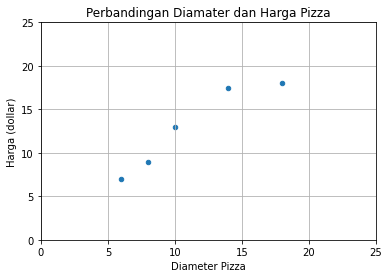

In [3]:
import matplotlib.pyplot as plt

pizza_df.plot(kind = 'scatter', x = 'diameter', y = 'harga')

plt.title('Perbandingan Diamater dan Harga Pizza')
plt.xlabel('Diameter Pizza')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Perhatikan titik-titik tersebuh seolah-olah membentuk garis lurus. Nah ini merupakan kasus yang tepat sekali untuk menerapkan **Linear Regression**.

### Penyesuaian Dataset

In [4]:
import numpy as np

X = np.array(pizza_df['diameter']) # feature
y = np.array(pizza_df['harga']) # target

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


Kita mengetahui sebelumnya bahwa model ML yang disertakan dalam scikit.learn membutuhkan sekumpulan nilai features yang ditampung dalam suatu **array dua dimensi**. Sehingga, disini perlu dilakukan *reshaping* pada array yang digunakan untuk menampung nilai features.

In [5]:
X = X.reshape(-1, 1) 
X.shape

(5, 1)

`reshape(-1, 1)` untuk membentuk vektor kolom

In [6]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

### Training Simple Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #object model
model.fit(X,y) # object model yang ditraining

LinearRegression()

### Visualisasi SImple Linear Regression Model

In [11]:
X_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(X_vis)

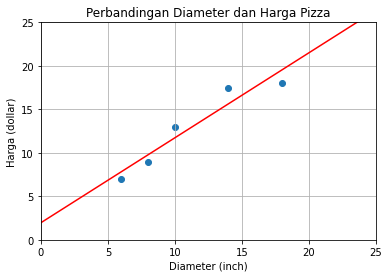

In [14]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r') # '-r' dengan - membentuk garis lurus dan r warna merah

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

### Formula Linear Regression: y = a + bx
* y : response variable
* x : explanatory variable
* a : intercept
* b : slope

In [18]:
print(f'intercept : {model.intercept_}')
print(f'slope: {model.coef_}')

intercept : 1.965517241379315
slope: [0.9762931]


### Mencari nilai slope (manual)
NIlai slope pada Linear Regression bisa diperoleh dengan membagi cov(x,y) dengan var(x)

In [23]:
print(f'X: \n {X} \n')
print(f'X flatten: {X.flatten()} \n')
print(f'y: {y}')

X: 
 [[ 6]
 [ 8]
 [10]
 [14]
 [18]] 

X flatten: [ 6  8 10 14 18] 

y: [ 7.   9.  13.  17.5 18. ]


#### Variance

In [24]:
variance_x = np.var(X.flatten(), ddof = 1) # ddof : degree of freedom

print(f'variance: {variance_x}')

variance: 23.2


#### Covariance

In [25]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [27]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.65


#### Slope

In [29]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 0.9762931034482758


### Mencari nilai intercept (manual)
Nilai intercept pada LInear Regression bisa diperoleh dengan pengurangan nilai rata-rata dari y dan hasil perkalian slope dan rata-rata x. 

In [30]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept: {intercept}')

intercept: 1.9655172413793114


### Prediksi Harga Pizza
Model Linear Regression yang telah ditraining sebelumnya akan digunakan untuk memprediksi harga pizza berdasarkan ukuran diameternya.

In [32]:
diameter_pizza = np.array([12,20,23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [33]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [35]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter: {dmtr} prediksi harga: {hrg}')

diameter: [12] prediksi harga: 13.681034482758621
diameter: [20] prediksi harga: 21.491379310344826
diameter: [23] prediksi harga: 24.42025862068965


### Evaluasi Simple Linear Regression Model

#### Training & Testing Dataset

In [36]:
X_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

X_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

#### Training Simple Linear Regression Model 

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared (R^2)

In [38]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


nilai R^2 adalah 66.2 % yang artinya model cukup baik.
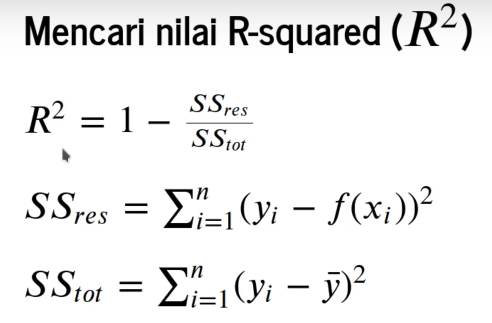

### Mencari nilai R-squared

In [39]:
ss_res = sum([(y_i -model.predict(x_i.reshape(-1,1))[0])**2
             for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [40]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [41]:
r_squared = 1-(ss_res/ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
